# 1.1 Импорт данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import stats as st

In [3]:
pd.set_option('display.max_rows', None)

In [6]:
#запишем данные в переменную и посмотрим, с чем будем работать
df = pd.read_csv('/home/user/Загрузки/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
#выведем верхушку таблицы
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 1.2 Вывод

Загрузила данные. В таблице 11 колонок и 16713 записей. В первом приближении вижу следующие недостатки в данных: названия столбцов лучше записать полностью в нижнем регистре; столбец с годом выпуска нужно привести к типу int, год не может быть дробным числом; столбцы с пользовательским и общим рейтингом надо перевести в числовой тип; в столбцах с названием, оценками, жанром и годом выпуска есть пропуски.

Столбец Rating заполнен буквенными обозначениями возрастных групп. Вероятно, потребуется "перевод", чтобы понимать, о чём речь.

# 2.1 Предобработка данных

In [8]:
#приведем названия колонок к нижнему регистру
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
#столбец с годом выпуска переведем в целочисленный формат
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [10]:
#проверим данные на наличие явных дубликатов
df.duplicated().sum()

0

In [11]:
#проверим таблицу на пустые значения
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [12]:
#пропуски в столбцах name и genre заполним значением unknown.  
df['name'] = df['name'].fillna('unknown')
df['genre'] = df['genre'].fillna('unknown')

In [13]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в столбце с годом выпуска можно заполнить только вручную. Никакие средние или медианные значения тут не подойдут. Этих пропусков не так много, всего 1,6% от общей массы данных. Предлагаю их не трогать, т.к. они не повлияют на результаты исследования.

На пропуски в оценках и рейтинге взгляну чуть ближе. Вероятно, оценки просто отсутствуют или не были подсчитаны.

In [14]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [15]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [16]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7       220
7.6     220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
6.4     107
5.8      97
9.1      90
6.1      84
5.7      78
5.9      77
5.6      72
5.4      72
5.5      71
5.3      70
5        64
5.2      57
4.8      49
5.1      44
9.2      43
4.9      40
4.6      37
4.3      37
4.5      34
4.4      33
4.1      33
9.3      31
4.2      28
3.8      28
4        27
3.5      26
2.8      24
4.7      24
3.4      23
3.1      23
3        21
3.6      20
3.7      19
3.3      15
3.9      13
3.2      13
2.5      12
2.4      11
2        11
9.4      11
2.1       9
1.7       9
2.9       9
2.7       8
9.5       6
1.8       6
2.2       6
1.4       5
2.6       4
1.6       3
1.2       3
0.5       2
1         2
0.9 

Значение 'tbd' расшифровывается как 'to be determined'. Это значит, что пользовательскую оценку игра пока не получила. Заменю значения tbd  на Nan, чтобы они не выделялись из общей массы отсутствующихзначений и не искажали исследование.

Пропуски в рейтинге мы тоже никак не заменим, только вручную. Предлагаю их не трогать, эти пропуски никак не повлияют на дальнейшее исследование.

In [17]:
#заменяем значения и проверяем результат
df['user_score'] = df['user_score'].replace('tbd', 'NaN')
df['user_score'].isna().sum()

6701

In [18]:
for column in df:
    display(df[column].unique())

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'unknown'], dtype=object)

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'NaN', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Повторы не обнаружены. Займусь типами столбцов с оценками, их нужно привести к числовому типу данных. Вещественный тип отлично подойдет.

In [19]:
df['critic_score'] = pd.to_numeric(df['critic_score'])

In [20]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Пропуски, типы данных и дубликаты обработала. Для дальнейшего исследования нам потребуются суммарные продажи по каждому региону. Подсчитаю их и запишу в отдельный столбец.

In [22]:
df['world_sales'] = df['na_sales'] +df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# 2.2 Вывод

Подготовила данные к работе: заполнила пропуски, где это было необходимо, обработала непонятные значения, заменила типы данных.

Рассчитала для каждой игры общие продажи по миру и записала их в отдельный столбец.

С подготовленными данными могу приступать к исследованию.

# 3.1 Исследовательский анализ

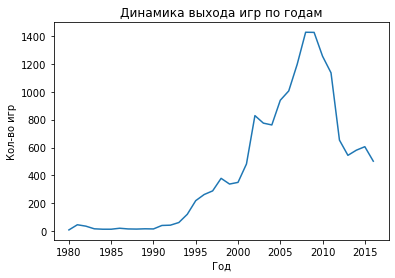

In [23]:
#посмотрим, сколько игр выпускалось в разные годы
df.groupby('year_of_release')['name'].count().plot()
plt.title('Динамика выхода игр по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.show()

Данные говорят, что в 2000-х произошёл резкий скачок в количестве выпускаемых за год игр. Это связано с тем, что в этот период произошёл качественный скачок в графике и звуке, игры стали более привлекательными, увеличилось количество игровых платформ, некоторые из них используются и популярны до сих пор. Также с 2000-х стало расти количество домашних компьютеров, игры становятся доступнее.

Начиная с 2012 года виден резкий спад в количестве выпускаемых игр. Это может быть связано с тем, что выход крупных игр 2011 года, таких как TES V: Skyrim, например, задал очень высокую планку. Игры стали сложнее, масштабнее, на их произодство уходит больше времени и денег.

Предлагаю использовать для исследования данные, начиная с 2000 года.

In [24]:
#запишем данные по выбранному временному периоду в отдельную переменную
df_selected = df[df['year_of_release'] >= 2000]

Text(0.5, 1.0, 'Распределение продаж по платформам')

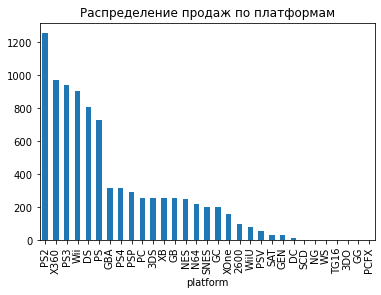

In [25]:
#посмотрим, как распределялись продажи по игровым платформам
df.groupby('platform')['world_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Распределение продаж по платформам')

Среди платформ за весь период лидируют продукты Sony: PS, PS2, PS3, PS4, PSP, XBox360 от Microsoft, GBA, он же GameBoy, а также Wii и DS от Японского гиганта Nintendo. Эти платформы живы и по сей день, для них было создано множество эксклюзивов с высокой долей реиграбельности. 

Посмотрим на средний срок жизни игровой платформы в целом.

Text(0.5, 1.0, 'График популярности игровых платформ')

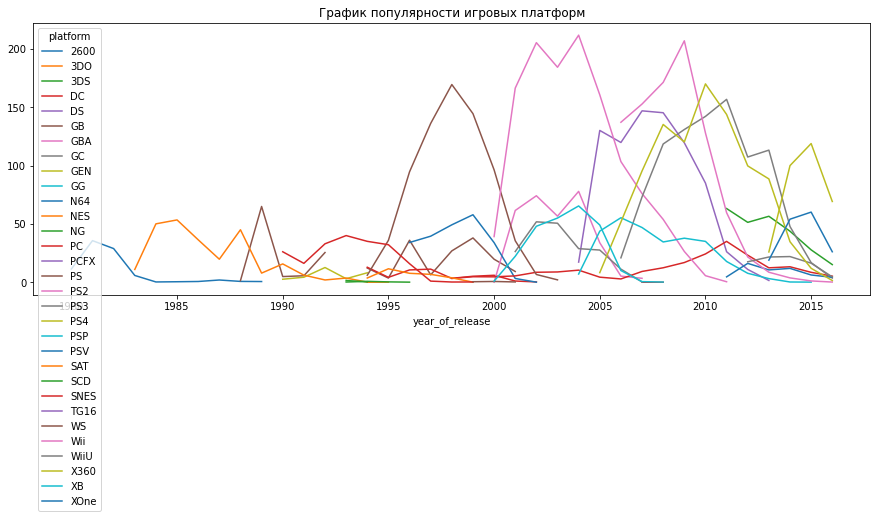

In [26]:
df.groupby(['platform','year_of_release'])['world_sales'].sum().unstack('platform').plot(figsize=(15, 5))
plt.title('График популярности игровых платформ')

Из графика видим, что средний срок "жизни" в среднем составляет 8-10 лет.

In [27]:
#рассмотрим продажи по платформам по нашему актуальному периоду
df_selected.groupby('platform')['world_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       205.72
GC       196.73
XOne     159.32
PS       140.70
WiiU      82.19
PSV       53.81
N64       37.30
GB        29.00
DC         7.41
WS         0.96
Name: world_sales, dtype: float64

PS2, PS3, Wii, DS и X360 показыввают лучшие результаты по продажам с 2000 года. Посмотрим, как менялась эта ситуация в динамике.

Text(0.5, 1.0, 'График продаж за период с 2000 года')

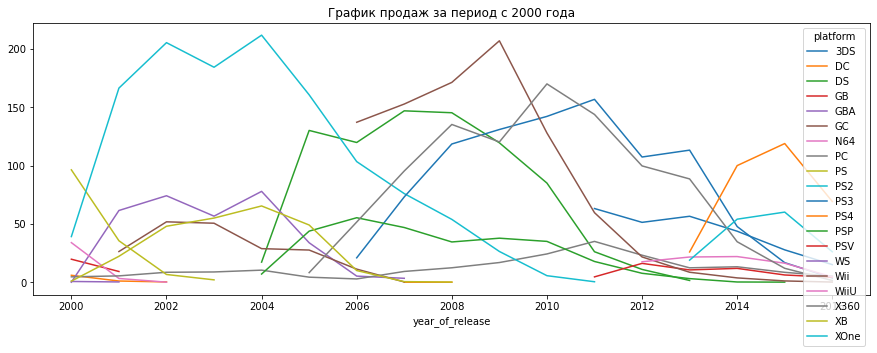

In [28]:
#линейчатый график
df_selected.groupby(['platform','year_of_release'])['world_sales'].sum().unstack('platform').plot(figsize=(15, 5))
plt.title('График продаж за период с 2000 года')

Из графика видим, что потенциально прибыльными платформами являются: XOne, WiiU и PS4 (выпущены относительно недавно и до сих пор популярны и доступны для среднего пользователя). Не будем исключать из списка и PS3, для которой создано много эксклюзивов и игр, ставших классикой, а также PC (на обычных комьютерах продолжают активно играть).  

Итого имеем: XOne, PS3, PS4, WiiU, PC. 

Text(0.5, 1.0, 'Распределение продаж по выбранным платформам')

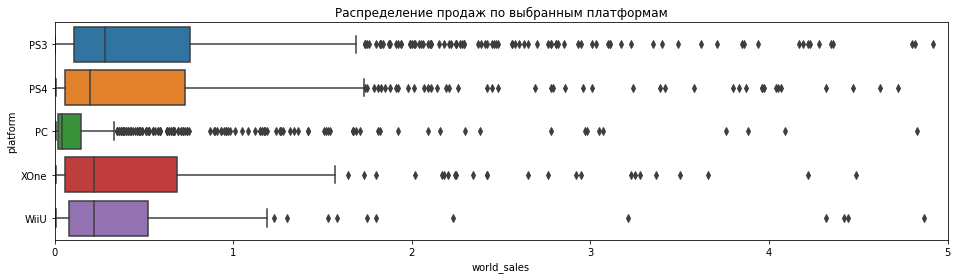

In [29]:
#посмотрим, как распределяются продажи по платформам
platforms = df_selected[df_selected['platform'].isin(['XOne', 'PS3', 'PS4', 'WiiU', 'PC'])]
plt.figure(figsize=(16,4))
plt.xlim([0, 5])
sbn.boxplot(data=platforms, x='world_sales', y='platform')
plt.title('Распределение продаж по выбранным платформам')

Графики смещены вправо относительно медианы, и мы видим выбросы в положительную сторону по каждой платформе. Игры на них действительно хорошо продаются.

Меньше всего продаж на PC, платформа не может конкурировать по количеству даже с японской WiiU, больше всего - на PS3. PS4 и Xbox One занимают второе место в мировом рейтинге. 

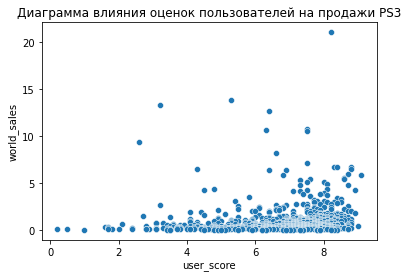

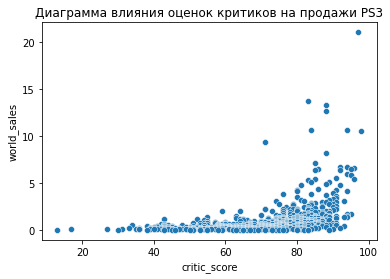

In [30]:
#влияние отзывов на продажи PS3
df_ps3 = df_selected[df_selected['platform'] == 'PS3']
sbn.scatterplot(data=df_ps3, x='user_score', y='world_sales')
plt.title('Диаграмма влияния оценок пользователей на продажи PS3')
plt.show()

sbn.scatterplot(data=df_ps3, x='critic_score', y='world_sales')
plt.title('Диаграмма влияния оценок критиков на продажи PS3')
plt.show()

Диаграмма показывает, что оценки пользователей и критиков влияет на продажи: чем лучше оценки, тем лучше продается игра. Посчитаем коэффициенты корреляции Пирсона, чтобы проверить это предположение. 

In [31]:
df_ps3['world_sales'].corr(df_ps3['user_score'])

0.12841562938563025

In [32]:
df_ps3['world_sales'].corr(df_ps3['critic_score'])

0.4327589578997141

В обоих случаях, с пользователями и критиками, налицо положительная зависимость, хоть и небольшая. Коэффициент для пользовательских оценок чуть ниже, т.к. они более субъективны.

В целом предположение верное - чем лучше отзывы, тем выше продажи. Проверим эти выводы для других популярных платформ.

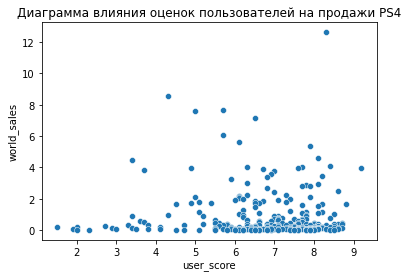

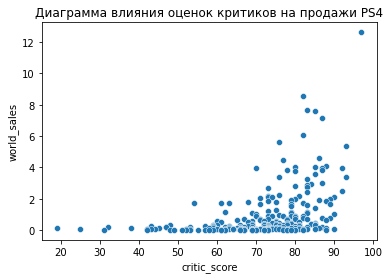

In [33]:
df_ps4 = df_selected[df_selected['platform'] == 'PS4']
sbn.scatterplot(data=df_ps4, x='user_score', y='world_sales')
plt.title('Диаграмма влияния оценок пользователей на продажи PS4')
plt.show()

sbn.scatterplot(data=df_ps4, x='critic_score', y='world_sales')
plt.title('Диаграмма влияния оценок критиков на продажи PS4')
plt.show()

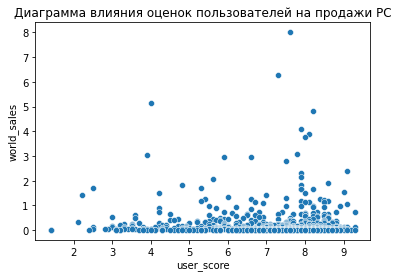

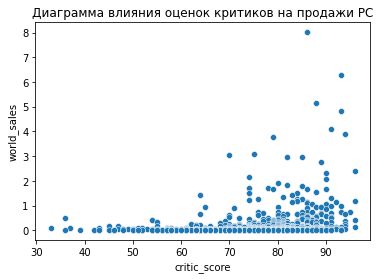

In [34]:
df_pc = df_selected[df_selected['platform'] == 'PC']
sbn.scatterplot(data=df_pc, x='user_score', y='world_sales')
plt.title('Диаграмма влияния оценок пользователей на продажи PC')
plt.show()

sbn.scatterplot(data=df_pc, x='critic_score', y='world_sales')
plt.title('Диаграмма влияния оценок критиков на продажи PC')
plt.show()

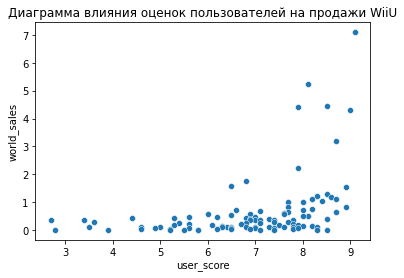

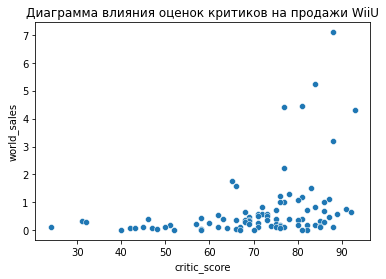

In [35]:
df_wiiu = df_selected[df_selected['platform'] == 'WiiU']
sbn.scatterplot(data=df_wiiu, x='user_score', y='world_sales')
plt.title('Диаграмма влияния оценок пользователей на продажи WiiU')
plt.show()

sbn.scatterplot(data=df_wiiu, x='critic_score', y='world_sales')
plt.title('Диаграмма влияния оценок критиков на продажи WiiU')
plt.show()

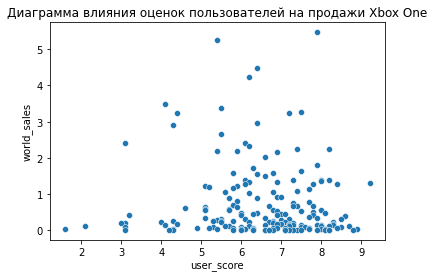

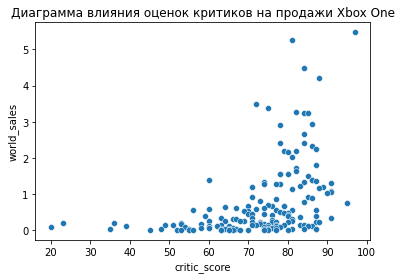

In [36]:
df_xone = df_selected[df_selected['platform'] == 'XOne']
sbn.scatterplot(data=df_xone, x='user_score', y='world_sales')
plt.title('Диаграмма влияния оценок пользователей на продажи Xbox One')
plt.show()

sbn.scatterplot(data=df_xone, x='critic_score', y='world_sales')
plt.title('Диаграмма влияния оценок критиков на продажи Xbox One')
plt.show()

Картина аналогичная по всем пяти популярным платформам. Чем положительнее отзывы критиков и игроков, тем выше продажи.

genre
Shooter         0.24
Platform        0.21
Sports          0.21
Fighting        0.19
Action          0.18
Racing          0.17
Role-Playing    0.16
Misc            0.15
Simulation      0.14
Puzzle          0.09
Strategy        0.08
Adventure       0.05
Name: world_sales, dtype: float64

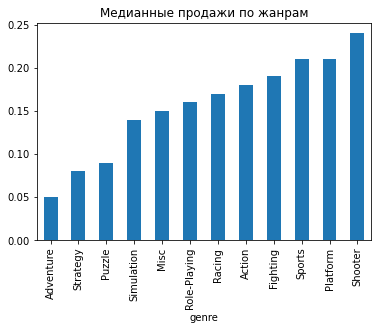

In [37]:
#посмотрим на распределение игр по жанрам
df_selected.groupby('genre')['world_sales'].median().sort_values().plot(kind='bar')
plt.title('Медианные продажи по жанрам')
df_selected.groupby('genre')['world_sales'].median().sort_values(ascending=False)

Самыми популярными жанрами в целом по миру являются шутеры, спортивные игры и платформеры.

Остальные жанры отстают от них по продажам. Хуже всего продаются стратегии и приключения. 

В целом, снижение по продажам достаточно плавное, нельзя сказать, что какие-то игры в однозначных аутсайдерах.

# 3.2 Вывод

Мы изучили рынок игровых платформ. Выявили, что средний срок жизни платформы - 8-10 лет. Выбрали 5 наиболее перспективных платформ для дальнейшего исследования: PC, XOne, PS3, PS4, WiiU.

Ддя каждой из этих платформ свойственны хорошие продажи: на графике сдвиг вправо и большое количество выбросов - игр с продажами выше средних.

Проверили зависимость продаж от рейтинга игроков и критиков: чем лучше оценка, тем лучше продаётся игра. Такая зависимость подтверждается исследованием 5 самых перспективных платформ.

Посмотрели на популярные жанры. В мировом разрезе лидируют шутеры, платформеры и спортивные игры.

# 4.1 Портрет пользователя по регионам

Посмотрим на игроков Северной Америки.

In [38]:
#выберем популярные платформы по Северной Америке
df_selected.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

platform
X360    16.878352
PS2     16.231822
Wii     13.793875
PS3     11.053063
DS      10.774845
Name: na_sales, dtype: float64

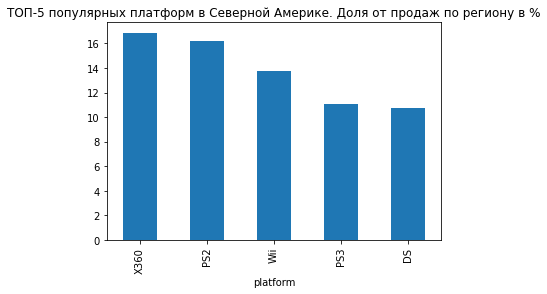

In [39]:
#посчитаем доли продаж ТОП-5 
((df_selected.groupby('platform')['na_sales'].sum() / df_selected['na_sales'].sum()) * 100).sort_values(ascending=False).head().plot(kind='bar')
plt.title('ТОП-5 популярных платформ в Северной Америке. Доля от продаж по региону в %')
((df_selected.groupby('platform')['na_sales'].sum() / df_selected['na_sales'].sum()) * 100).sort_values(ascending=False).head()

genre
Action          21.313120
Sports          16.698445
Shooter         14.030729
Misc            10.348735
Role-Playing     7.998051
Name: na_sales, dtype: float64

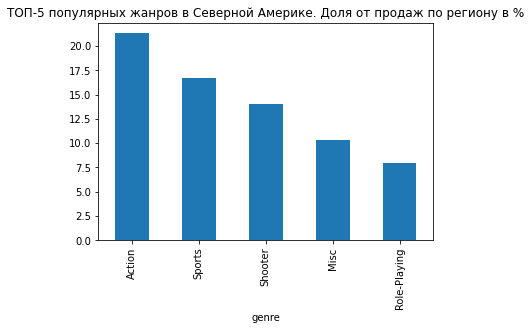

In [40]:
#выберем популярные жанры по Северной Америке
df_selected.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
((df_selected.groupby('genre')['na_sales'].sum() / df_selected['na_sales'].sum()) * 100).sort_values(ascending=False).head().plot(kind='bar')
plt.title('ТОП-5 популярных жанров в Северной Америке. Доля от продаж по региону в %')
((df_selected.groupby('genre')['na_sales'].sum() / df_selected['na_sales'].sum()) * 100).sort_values(ascending=False).head()

Мгроки Севеврной Америки предпочитают приставки от Sony PlayStation, Xbox и Nintendo Wii. Процентильный разброс не очень большой, лидирует Xbox.

Посмотрим на игроков Европы.

In [41]:
#выберем популярные платформы по Европе
df_selected.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
DS      188.41
Name: eu_sales, dtype: float64

platform
PS2     15.948811
PS3     15.688935
X360    12.865301
Wii     12.385825
DS       9.033808
Name: eu_sales, dtype: float64

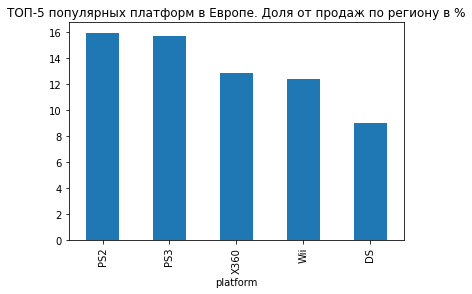

In [42]:
#посчитаем доли продаж ТОП-5 
((df_selected.groupby('platform')['eu_sales'].sum() / df_selected['eu_sales'].sum()) * 100).sort_values(ascending=False).head().plot(kind='bar')
plt.title('ТОП-5 популярных платформ в Европе. Доля от продаж по региону в %')
((df_selected.groupby('platform')['eu_sales'].sum() / df_selected['eu_sales'].sum()) * 100).sort_values(ascending=False).head()

In [43]:
#выберем популярные жанры по Европе
df_selected.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

genre
Action     466.58
Sports     339.58
Shooter    294.02
Misc       196.71
Racing     192.02
Name: eu_sales, dtype: float64

genre
Action     22.371393
Sports     16.282047
Shooter    14.097554
Misc        9.431773
Racing      9.206899
Name: eu_sales, dtype: float64

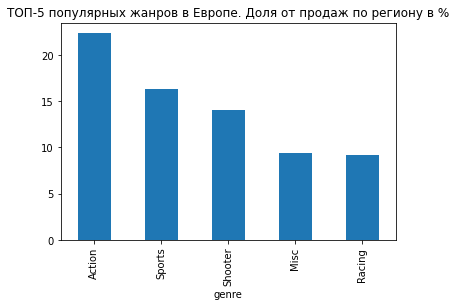

In [44]:
((df_selected.groupby('genre')['eu_sales'].sum() / df_selected['eu_sales'].sum()) * 100).sort_values(ascending=False).head().plot(kind='bar')
plt.title('ТОП-5 популярных жанров в Европе. Доля от продаж по региону в %')
((df_selected.groupby('genre')['eu_sales'].sum() / df_selected['eu_sales'].sum()) * 100).sort_values(ascending=False).head()

PS2 и PS3 остаются лучшими приставками для европейцев. САмый популярный жанр - action.

Посмотрим на японских игроков.

In [45]:
#выберем популярные платформы по Японии
df_selected.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

platform
DS     175.00
PS2    137.54
3DS    100.62
PS3     79.41
PSP     75.88
Name: jp_sales, dtype: float64

platform
DS     21.450810
PS2    16.859111
3DS    12.333603
PS3     9.733765
PSP     9.301071
Name: jp_sales, dtype: float64

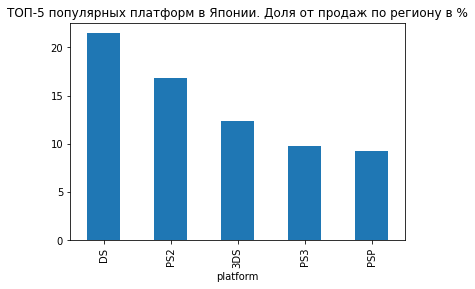

In [46]:
#посчитаем доли продаж ТОП-5 
((df_selected.groupby('platform')['jp_sales'].sum() / df_selected['jp_sales'].sum()) * 100).sort_values(ascending=False).head().plot(kind='bar')
plt.title('ТОП-5 популярных платформ в Японии. Доля от продаж по региону в %')
((df_selected.groupby('platform')['jp_sales'].sum() / df_selected['jp_sales'].sum()) * 100).sort_values(ascending=False).head()

In [47]:
#выберем популярные жанры по Японии
df_selected.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

genre
Role-Playing    241.71
Action          132.23
Misc             85.43
Sports           75.88
Platform         55.27
Name: jp_sales, dtype: float64

genre
Role-Playing    29.627859
Action          16.208232
Misc            10.471673
Sports           9.301071
Platform         6.774779
Name: jp_sales, dtype: float64

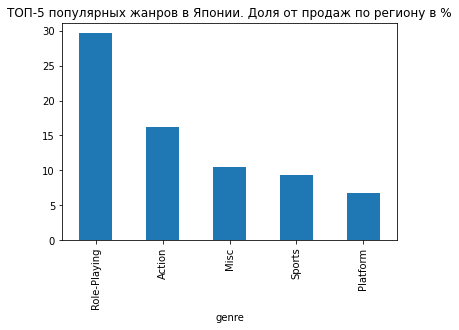

In [48]:
((df_selected.groupby('genre')['jp_sales'].sum() / df_selected['jp_sales'].sum()) * 100).sort_values(ascending=False).head().plot(kind='bar')
plt.title('ТОП-5 популярных жанров в Японии. Доля от продаж по региону в %')
((df_selected.groupby('genre')['jp_sales'].sum() / df_selected['jp_sales'].sum()) * 100).sort_values(ascending=False).head()

Японцы предпочитают родные продукты от Nintendo и Sony. Самый популярный игровой жанр - ролевые игры. Также только в Японии в топ-5 попала портативная приставка PSP. 

rating
E       35.393712
M       20.619842
T       20.111570
E10+     9.788617
EC       0.043348
Name: na_sales, dtype: float64

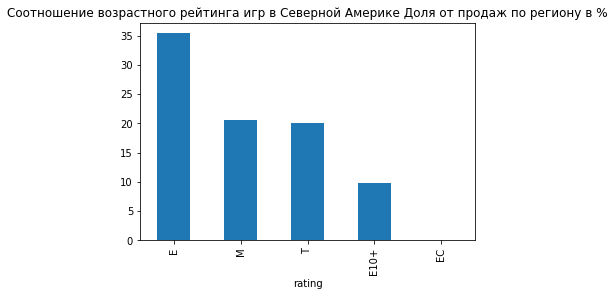

In [49]:
#проверим возрастной рейтинг по Северной Америке
((df_selected.groupby('rating')['na_sales'].sum() / df_selected['na_sales'].sum()) * 100).sort_values(ascending=False).head().plot(kind='bar')
plt.title('Соотношение возрастного рейтинга игр в Северной Америке Доля от продаж по региону в %')
((df_selected.groupby('rating')['na_sales'].sum() / df_selected['na_sales'].sum()) * 100).sort_values(ascending=False).head()

rating
E       33.113094
M       22.650448
T       18.829503
E10+     8.790234
AO       0.029248
Name: eu_sales, dtype: float64

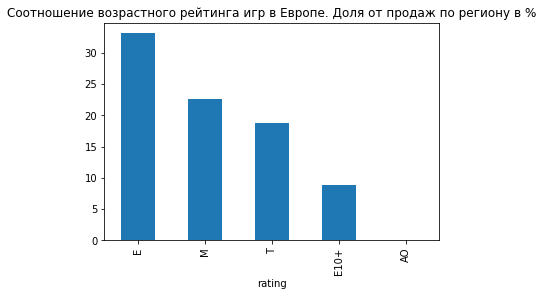

In [50]:
#проверим возрастной рейтинг по Европе
((df_selected.groupby('rating')['eu_sales'].sum() / df_selected['eu_sales'].sum()) * 100).sort_values(ascending=False).head().plot(kind='bar')
plt.title('Соотношение возрастного рейтинга игр в Европе. Доля от продаж по региону в %')
((df_selected.groupby('rating')['eu_sales'].sum() / df_selected['eu_sales'].sum()) * 100).sort_values(ascending=False).head()

rating
E       23.278419
T       16.058689
M        7.089799
E10+     4.927558
AO       0.000000
Name: jp_sales, dtype: float64

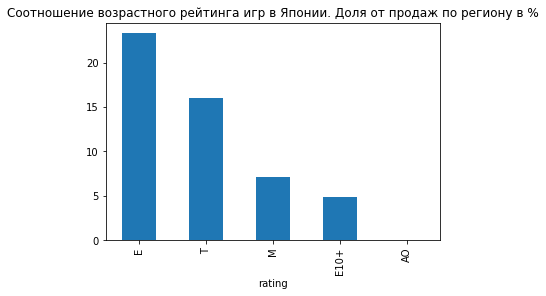

In [51]:
#проверим возрастной рейтинг по Японии
((df_selected.groupby('rating')['jp_sales'].sum() / df_selected['jp_sales'].sum()) * 100).sort_values(ascending=False).head().plot(kind='bar')
plt.title('Соотношение возрастного рейтинга игр в Японии. Доля от продаж по региону в %')
((df_selected.groupby('rating')['jp_sales'].sum() / df_selected['jp_sales'].sum()) * 100).sort_values(ascending=False).head()

Во всех регионах тройку лидеров по возрастному рейтингу составляют Е (все возрасты), М (17+) и Т (13+). Игры с рейтингом Е идут с большим отрывом по продажам в каждом регионе. 

Небольшое количество европейских игроков также предпочитает игры с рейтингом АО (только для взрослых).

# 4.2 Вывод

Составили портреты пользователей по регионам.

Северная Америка играет на всех типах платформ понемногу: лидируют в ТОП-5 X360 и PS2, присутствуют в списке и продукты Nintendo. Любимые жанры: action, sports, shooter.

Европейцы больше любят PlayStation - PS2 и PS3 возглавляют ТОП-5. На третьем месте X360, замыкают пятёрку приставки Nintendo. Любимые жанры такие же, как у американцев.

Япония, как всегда, выделяется. ТОП-5 игровых платформ возглавляет Nintendo DS. Также в лидерах приставки PS2, PS3 и PSP. Любимый жанр японцев - ролевые игры, он идет с огромным отрывом.

По возрастному рейтингу ситуация в трёх регионах примерно одинаковая. Чаще всего покупают игры для всех возрастов, 17+ и 13+. Хороший результат показывают игры для детей от 10 лет. В Европе в ТОП-5 попал небольшой процент игр для взрослых.

# 5.1 Проверка гипотез

1.Нулевая гипотеза: •	средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [52]:
#сохраним срезы по платформам в отдельные переменные
df_box = df_selected[(df_selected['platform'] == 'XOne') & (df_selected['user_score'] != 0)]['user_score']
df_pc = df_selected[(df_selected['platform'] == 'PC') & (df_selected['user_score'] != 0)]['user_score']
df_box.head()

99     NaN
165    7.9
179    5.4
242    6.4
270    6.2
Name: user_score, dtype: float64

Критическую величину alpha зададим в размере 5% и рассчитаем t-тестом р-значение для проверки гипотез. 

In [53]:
results = st.ttest_ind(df_box, df_pc, equal_var=False, nan_policy='omit')
results.pvalue

1.5670097178375512e-05

Полученное значение сильно больше заданной критической величины, поэтому отвергнуть нулевую гипотезу мы не можем: средние пользовательские рейтинги XOne и PC не сильно отличаются друг от друга.

2. Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports разные. Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports равны или близки друг к другу.

In [54]:
#задаём соответствующие срезы из нашего датасета
df_sport = df_selected[(df_selected['genre'] == 'Sports') & (df_selected['user_score'] != 0)]['user_score']
df_sport.head()

0     8.0
3     8.0
13    7.7
15    7.4
77    4.3
Name: user_score, dtype: float64

In [55]:
df_action = df_selected[(df_selected['genre'] == 'Action') & (df_selected['user_score'] != 0)]['user_score']
df_action.head()

16    8.2
17    9.0
23    8.1
24    8.7
38    8.5
Name: user_score, dtype: float64

In [56]:
alpha = .05
results = st.ttest_ind(df_sport, df_action, equal_var=False, nan_policy='omit')
results.pvalue

0.1011512015659749

P-value выше порогового значения. Это говорит о том, что мы не можем отвергнуть первоначальную гипотезу. Средние пользовательскте рейтинги игра в жанрах Action и Sports различаются.

# 5.2 Вывод

Мы проверили гипотезы на статистическую вероятность. Получились такие результаты: 

игры жанров Action и Sports пользователи оценивают похоже, нет оснований утверждать, что их  рейтинги сильно различаются;

средние пользовательске рейтинги Xbox и PC отличаются друг от друга.

В обоих случаях исходные гипотезы не подтвердились.

# 6 Общий вывод

Мы проанализировали игровой рынок с 2000 по 2016 год.

Выделили наиболее перспективные для продажи игровые платформы: PS3, PS4, XOne, WiiU, PC. Для этих платформ выпускают много игр, которые хорошо продаются.

Наиболее популярные жанры в мировом разрезе: shooter, platform, action, fighting, sports. Такие игры будут востребованы всегда. 

В отдельных регионах ситуация может быть иной, так в Японии с большим отрывом лидируют ролевые игры.

Среди возрастных категорий лидирует общая категория игр, пригодных для всех возрастов.

На эти вехи стоит оориентироваться, планируя дальнейшие продажи.